# Medical Insurance Cost Prediction
The objective of this case study is to predict the health insurance cost incurred by Individuals based on their age, gender, BMI, number of children, smoking habit and geo-location.


### Features available are:

- sex: insurance contractor gender, female, male

- bmi: Body mass index (ideally 18.5 to 24.9)

- children: Number of children covered by health insurance / Number of dependents

- smoker: smoking habits

- region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

- charges: Individual medical costs billed by health insurance

In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

%matplotlib inline
sns.set_style('darkgrid')

In [2]:
#Load the data as a dataframe
insurance = pd.read_csv('insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
#get the shape of the dataset
insurance.shape

(1338, 7)

In [4]:
#get basic information contained in the dataset
insurance.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
#Get the basic descriptive statics of the features in the dataset
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
#We should change the region feature into binary intergers for each region
#The drop_first parameter drops the first column in order to reduce redudancy
region = pd.get_dummies(insurance['region'],drop_first=True,dtype=int)

region.head()

,northwest,southeast,southwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0


In [7]:
#combine the region data to the insurance dataset
insurance = pd.concat([insurance,region],axis=1)

#drop the region column
insurance.drop('region',axis=1,inplace=True)

insurance.head(10)

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
0,19,female,27.900,0,yes,16884.92400,0,0,1
1,18,male,33.770,1,no,1725.55230,0,1,0
2,28,male,33.000,3,no,4449.46200,0,1,0
3,33,male,22.705,0,no,21984.47061,1,0,0
4,32,male,28.880,0,no,3866.85520,1,0,0
5,31,female,25.740,0,no,3756.62160,0,1,0
6,46,female,33.440,1,no,8240.58960,0,1,0
7,37,female,27.740,3,no,7281.50560,1,0,0
8,37,male,29.830,2,no,6406.41070,0,0,0
9,60,female,25.840,0,no,28923.13692,1,0,0


In [8]:
#Look fo missing values for every column
insurance.isnull().sum()

age          0
sex          0
bmi          0
children     0
smoker       0
charges      0
northwest    0
southeast    0
southwest    0
dtype: int64

The data has no null values

Text(0.5, 1.0, 'Age distribution')

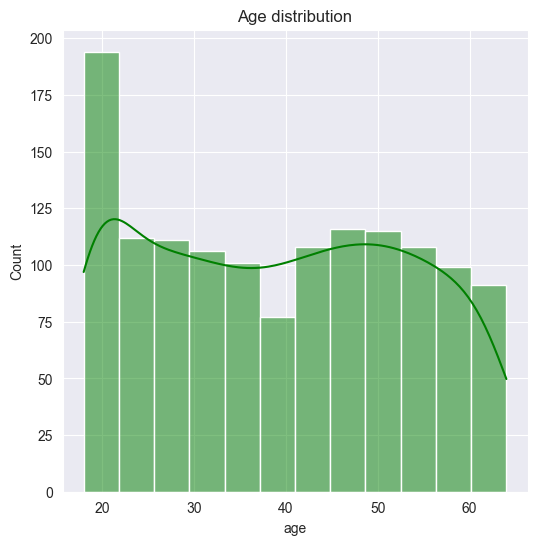

In [9]:
#plot the distribution of age

plt.figure(figsize=(6,6))
sns.histplot(insurance['age'],color='g',kde=True)
plt.title('Age distribution')


In [10]:
age_df = insurance.drop(['smoker','sex'],axis=1).groupby(by='age').mean()
age_df


,bmi,children,charges,northwest,southeast,southwest
age,,,,,,
18,31.326159,0.449275,7086.217556,0.000000,0.536232,0.000000
19,28.596912,0.426471,9747.909335,0.500000,0.044118,0.455882
20,30.632759,0.862069,10159.697736,0.241379,0.275862,0.275862
21,28.185714,0.785714,4730.464330,0.250000,0.250000,0.250000
22,31.087679,0.714286,10012.932802,0.250000,0.285714,0.214286
23,31.454464,1.000000,12419.820040,0.250000,0.250000,0.250000
24,29.142679,0.464286,10648.015962,0.250000,0.250000,0.250000
25,29.693929,1.285714,9838.365311,0.250000,0.250000,0.250000
26,29.428929,1.071429,6133.825309,0.250000,0.250000,0.250000


<Figure size 640x480 with 0 Axes>

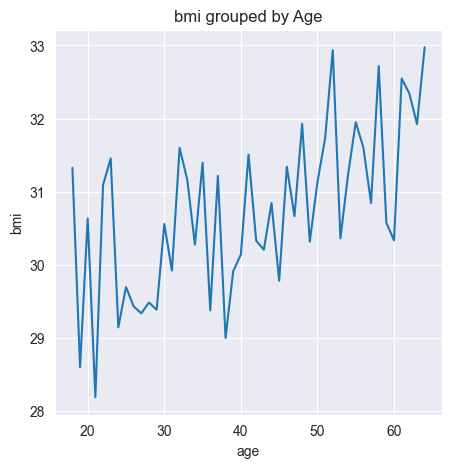

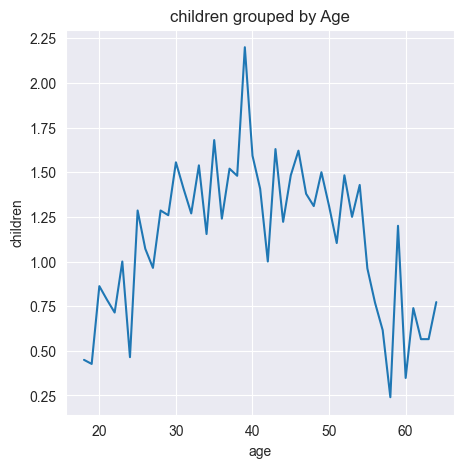

In [11]:

#for each age group plor the averages
plt.tight_layout()
for x in ['bmi','children']:
    plt.figure(figsize=(5,5))
    sns.lineplot(age_df[x])
    plt.title(f'{x} grouped by Age' )
    


Text(0.5, 1.0, 'Charges By Age')

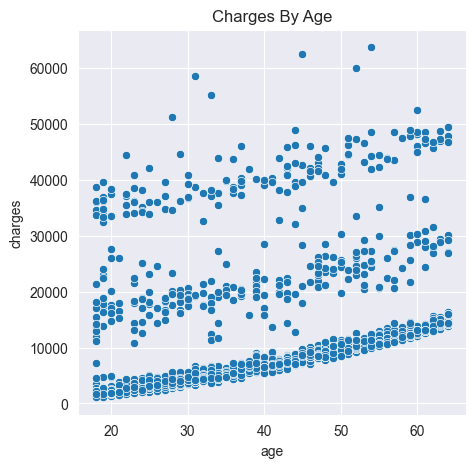

In [12]:
#how does age affect the cost
plt.figure(figsize=(5,5))
sns.scatterplot(x=insurance['age'],y=insurance['charges'])
plt.title('Charges By Age')

How does bmi affect the Cost

Text(0.5, 1.0, 'Distribution of bmi')

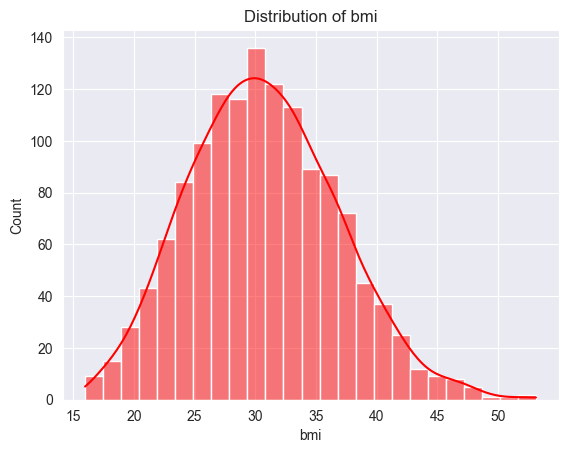

In [13]:
sns.histplot(insurance['bmi'],color='red',kde=True)
plt.title('Distribution of bmi')

Text(0.5, 1.0, 'Charges by bmi')

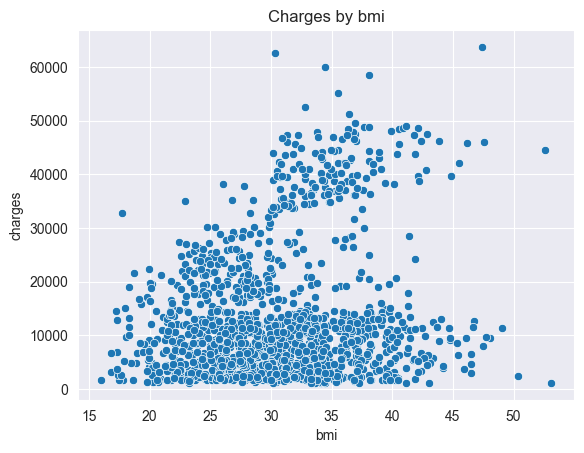

In [14]:
sns.scatterplot(x=insurance['bmi'],y=insurance['charges'])
plt.title('Charges by bmi')

<Axes: title={'center': 'Correlation between numerical features '}>

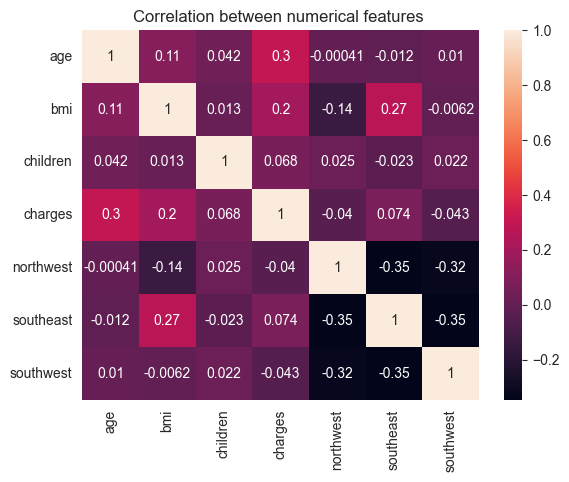

In [15]:
#Find the correlation between the features
plt.title('Correlation between numerical features ') 
sns.heatmap(insurance.drop(['smoker','sex'],axis=1).corr(),annot=True)

smoker
0    1064
1     274
Name: count, dtype: int64


Text(0.5, 1.0, 'Distribution of charges in non-smokers')

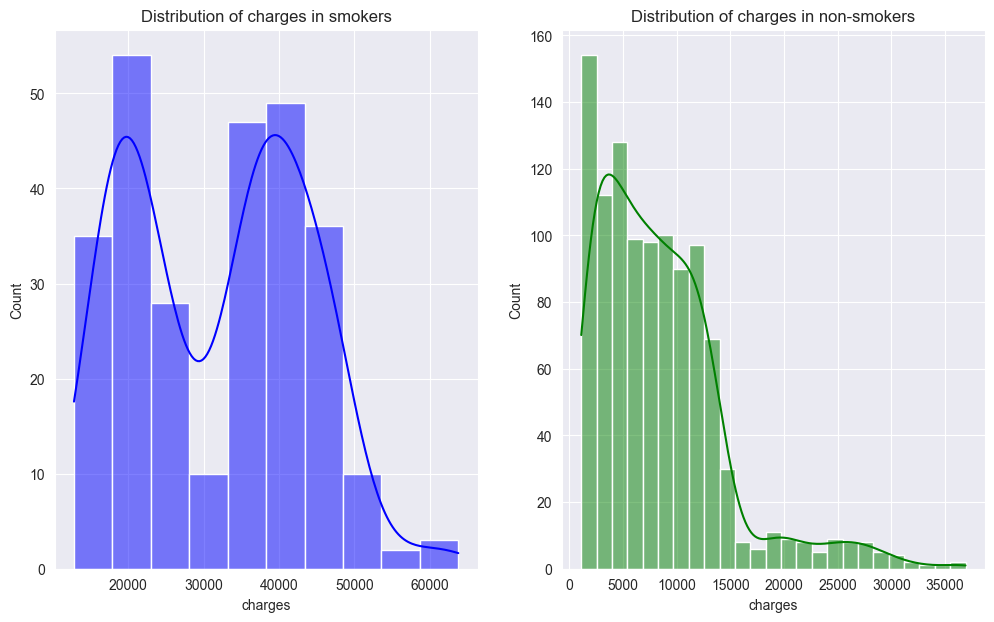

In [16]:
#What is the effect of smoking on charges

#encode the categorical variables
from sklearn.preprocessing import LabelEncoder 
encoder = LabelEncoder()
insurance['smoker'] = encoder.fit_transform(insurance['smoker'])
insurance['sex'] = encoder.fit_transform(insurance['sex'])

print(insurance['smoker'].value_counts())
f = plt.figure(figsize=(12,7))

sub1 = f.add_subplot(121)
sns.histplot(insurance[(insurance['smoker']==1)]['charges'],color='b',kde=True,ax=sub1)
plt.title('Distribution of charges in smokers')

sub2 = f.add_subplot(122)
sns.histplot(insurance[(insurance['smoker']==0)]['charges'],ax=sub2,color='g',kde=True)
plt.title('Distribution of charges in non-smokers')


It appears that majority of the nonsmokers generally pay lesser charges than the smokers

In [17]:
insurance

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,1,0,0
1334,18,0,31.920,0,0,2205.98080,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,1


In [18]:
#import the models and split the data into train and test
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import  LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV 


from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(insurance.drop('charges',axis=1),insurance['charges'],test_size=0.3,random_state=1)

print(x_train.shape,x_test.shape,y_train.shape,x_test.shape)

(936, 8) (402, 8) (936,) (402, 8)


In [19]:
random_forest = RandomForestRegressor()
forest_param = {
    'n_estimators' : [100,150,200,250,300,350,400] ,
    'max_depth': [2,4,5,6,7,8,9],
    'max_features': ['auto', 'sqrt', 'log2'],
    'random_state' : [0,1,42]
}

cv_random = RandomizedSearchCV(random_forest,forest_param,cv=5,scoring='accuracy')
cv_random.fit(x_train,y_train)

print(cv_random.best_params_)


c:\Users\Thuo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Thuo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Thuo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Thuo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._sco

{'random_state': 42, 'n_estimators': 200, 'max_features': 'log2', 'max_depth': 8}


In [20]:
random_forest = RandomForestRegressor(random_state=1,n_estimators=300,max_features='sqrt',max_depth=4) 
decision_tree = DecisionTreeRegressor()
ada_boost = AdaBoostRegressor()
linear = LinearRegression()
gradient_boost = GradientBoostingRegressor()

models = [random_forest,decision_tree,ada_boost,linear,gradient_boost]

for model in models:
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    print(f' model : {model}, R2-squared: {metrics.r2_score(y_test,pred)} ')


 model : RandomForestRegressor(max_depth=4, max_features='sqrt', n_estimators=300,
                      random_state=1), R2-squared: 0.7285489371534077 
 model : DecisionTreeRegressor(), R2-squared: 0.7015427561493263 
 model : AdaBoostRegressor(), R2-squared: 0.8019147466682607 
 model : LinearRegression(), R2-squared: 0.7405989316927212 
 model : GradientBoostingRegressor(), R2-squared: 0.8573611627112493 


the best model is the GradientBoostingRegressor

In [21]:
model = GradientBoostingRegressor()
model.fit(x_train,y_train)
prediction = model.predict(x_test)

print(f'the R2-score of the model is {metrics.r2_score(y_test,prediction)}')

the R2-score of the model is 0.8573611627112493



   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   --

TensorFlow version: 2.18.0
